In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [3]:
from sklearn.datasets import load_breast_cancer

In [5]:
data = load_breast_cancer()

In [6]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [7]:
X = data['data']
feature_names = data['feature_names']

In [8]:
Y = data['target']
class_names = data['target_names']

In [9]:
feature_names, class_names

(array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'),
 array(['malignant', 'benign'], dtype='<U9'))

In [10]:
X.shape

(569, 30)

In [11]:
Y.shape

(569,)

In [12]:
type(X)

numpy.ndarray

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.25, random_state=123, stratify=Y
)

In [16]:
scaler.fit(X_train)

StandardScaler()

In [17]:
X_train = scaler.transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

In [19]:
pca = PCA(n_components=2)

In [21]:
pca.fit(X_train)

PCA(n_components=2)

In [22]:
X_train.shape

(426, 30)

In [23]:
pca.components_.shape

(2, 30)

In [24]:
pca_names = [f'pca_{i}' for i in range(pca.n_components_)]

In [25]:
pca_names

['pca_0', 'pca_1']

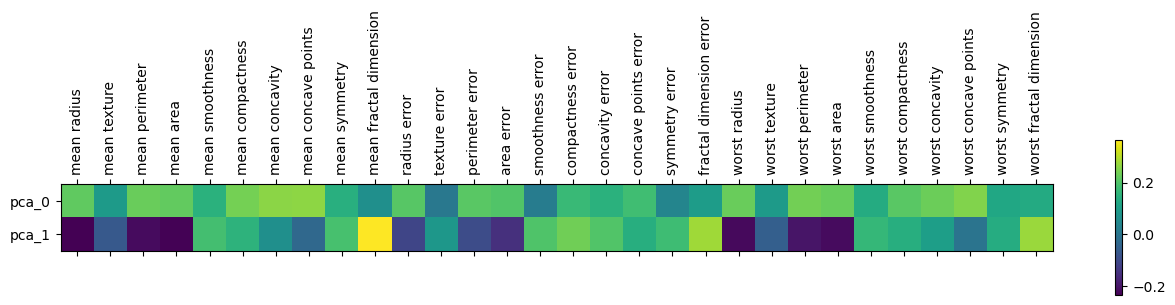

In [26]:
plt.matshow(pca.components_)
plt.xticks(ticks=range(pca.components_.shape[1]),
          labels=feature_names, rotation='vertical')
plt.yticks(ticks=range(pca.n_components_), labels=pca_names)
plt.colorbar()
plt.show()

In [27]:
pca.explained_variance_

array([13.1425886,  5.9362313])

In [28]:
pca.explained_variance_ratio_

array([0.43705792, 0.19740988])

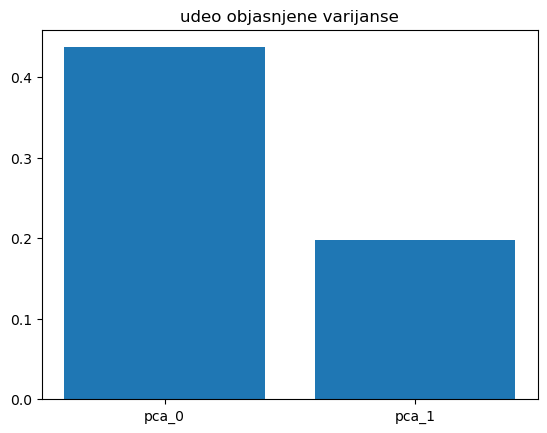

In [29]:
plt.bar(x=pca_names, height=pca.explained_variance_ratio_)
plt.title('udeo objasnjene varijanse')
plt.show()

In [30]:
cummulative_sum = np.cumsum(pca.explained_variance_ratio_)

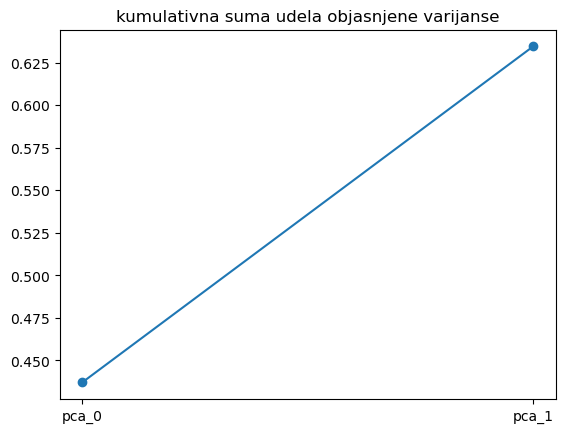

In [31]:
plt.plot(pca_names, cummulative_sum, marker='o')
plt.title('kumulativna suma udela objasnjene varijanse')
plt.show()

In [32]:
X_train_pca = pca.transform(X_train)

In [33]:
X_test_pca = pca.transform(X_test)

In [34]:
X_train_pca.shape

(426, 2)

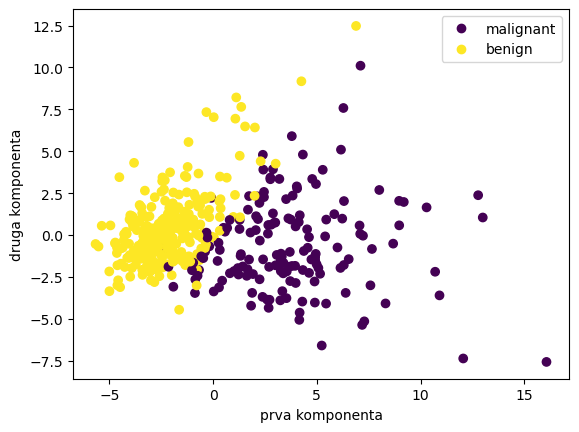

In [35]:
scatter = plt.scatter(X_train_pca[:,0], X_train_pca[:, 1], c=y_train)
plt.xlabel('prva komponenta')
plt.ylabel('druga komponenta')
plt.legend(handles=scatter.legend_elements()[0], labels=class_names.tolist())
plt.show()

In [36]:
pca.inverse_transform(np.random.random(size=(1,2)))

array([[-0.04540797, -0.00557508, -0.03555373, -0.04290229,  0.11755702,
         0.12759755,  0.09431938,  0.05344215,  0.11862603,  0.17349985,
         0.0061692 ,  0.0371617 ,  0.01336772, -0.01422899,  0.09045702,
         0.14519626,  0.12461686,  0.10747288,  0.08624904,  0.14554898,
        -0.03667469,  0.00062039, -0.02585758, -0.03618338,  0.10569832,
         0.11505474,  0.10241797,  0.06230895,  0.090154  ,  0.15275335]])